In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, top_k_accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import pandas as pd
from tueplots.constants.color import rgb
from tensorflow.keras.models import load_model
import numpy as np

plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
dataset = 'images_cropped_augmented_2000'
run = 'images_cropped_augmented_2000'


In [3]:
results = {}
top_results = pd.DataFrame(columns=['Model', 'Dataset', 'Accuracy', 'Top-3 Accuracy', 'Top-5 Accuracy'])

for dataset in os.listdir('../mod/'):
    for file in os.listdir(f'../mod/{dataset}/'):
        if file.endswith('.csv'):
            model = os.path.splitext(file)[0]
            print(f'Processing {model}...')
            history = pd.read_csv(f'../mod/{dataset}/{file}')
            results[model + ' ' + dataset] = history
            top_results = pd.concat([top_results, pd.DataFrame({'Model': model,
                                                                'Dataset': dataset,
                                                                'Accuracy': history['val_accuracy'].max(),
                                                                'Top-3 Accuracy': history['val_top_3_accuracy'].max(),
                                                                'Top-5 Accuracy': history['val_top_5_accuracy'].max()}, index=[0])])
top_results.sort_values(by='Accuracy', ascending=False)


Processing MobileNet...
Processing OwnModel...
Processing OwnModelRegularized...
Processing ResNet50...
Processing VGG16...


C:\Users\david\AppData\Local\Temp\ipykernel_12224\2276144770.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_results = pd.concat([top_results, pd.DataFrame({'Model': model,


,Model,Dataset,Accuracy,Top-3 Accuracy,Top-5 Accuracy
0,ResNet50,images_cropped_augmented_2000,0.563305,0.877011,0.924228
0,OwnModelRegularized,images_cropped_augmented_2000,0.538542,0.854727,0.912685
0,VGG16,images_cropped_augmented_2000,0.516501,0.845589,0.906756
0,OwnModel,images_cropped_augmented_2000,0.507606,0.828044,0.892461
0,MobileNet,images_cropped_augmented_2000,0.456476,0.755577,0.833609


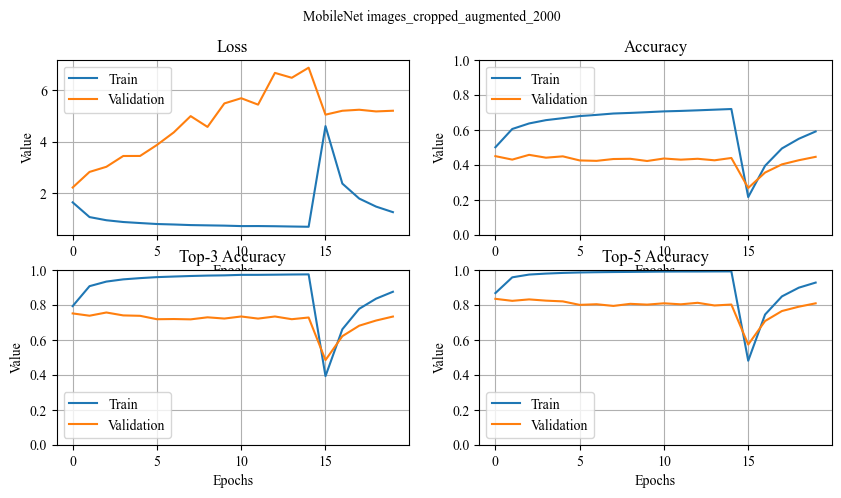

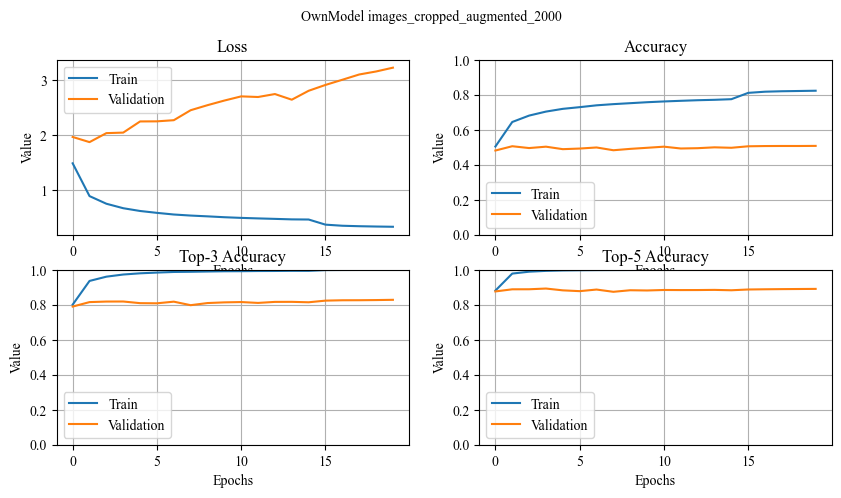

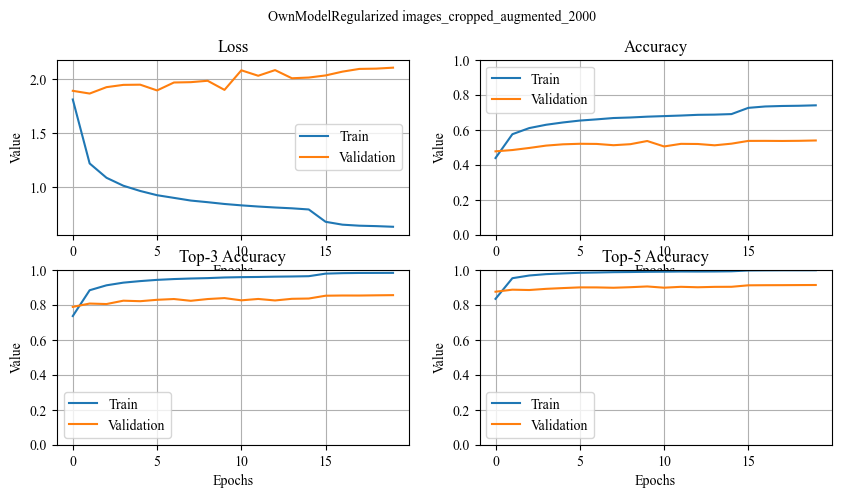

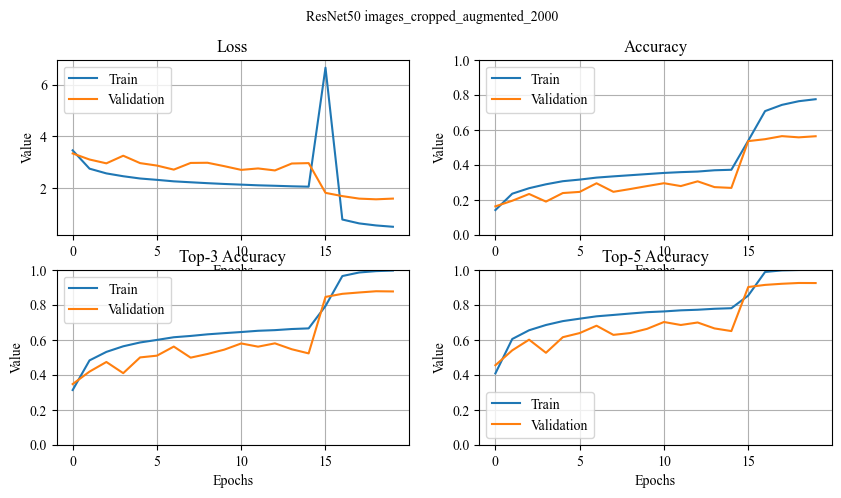

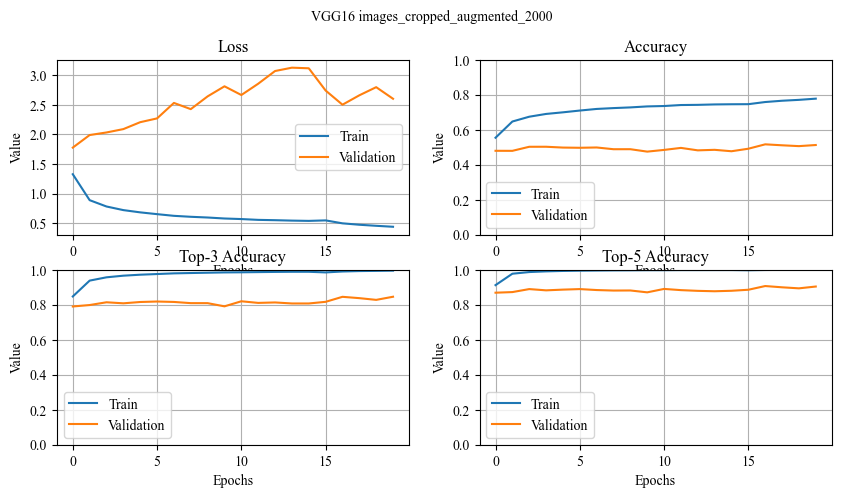

In [4]:
# Define a function to plot the metrics with adjusted y-axis limits for accuracy plots
def plot_metrics_adjusted(history, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 5))
    fig.suptitle(title, fontsize=10)

    # Loss
    axs[0, 0].plot(history['loss'], label='Train')
    axs[0, 0].plot(history['val_loss'], label='Validation')
    axs[0, 0].set_title('Loss')
    axs[0, 0].legend()

    # Accuracy
    axs[0, 1].plot(history['accuracy'], label='Train')
    axs[0, 1].plot(history['val_accuracy'], label='Validation')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].set_ylim([0, 1])
    axs[0, 1].legend()

    # Top-3 Accuracy
    axs[1, 0].plot(history['top_3_accuracy'], label='Train')
    axs[1, 0].plot(history['val_top_3_accuracy'], label='Validation')
    axs[1, 0].set_title('Top-3 Accuracy')
    axs[1, 0].set_ylim([0, 1])
    axs[1, 0].legend()

    # Top-5 Accuracy
    axs[1, 1].plot(history['top_5_accuracy'], label='Train')
    axs[1, 1].plot(history['val_top_5_accuracy'], label='Validation')
    axs[1, 1].set_title('Top-5 Accuracy')
    axs[1, 1].set_ylim([0, 1])
    axs[1, 1].legend()

    for ax in axs.flat:
        ax.set(xlabel='Epochs', ylabel='Value')
        ax.grid()

for model, history in results.items():
    plot_metrics_adjusted(history, model)


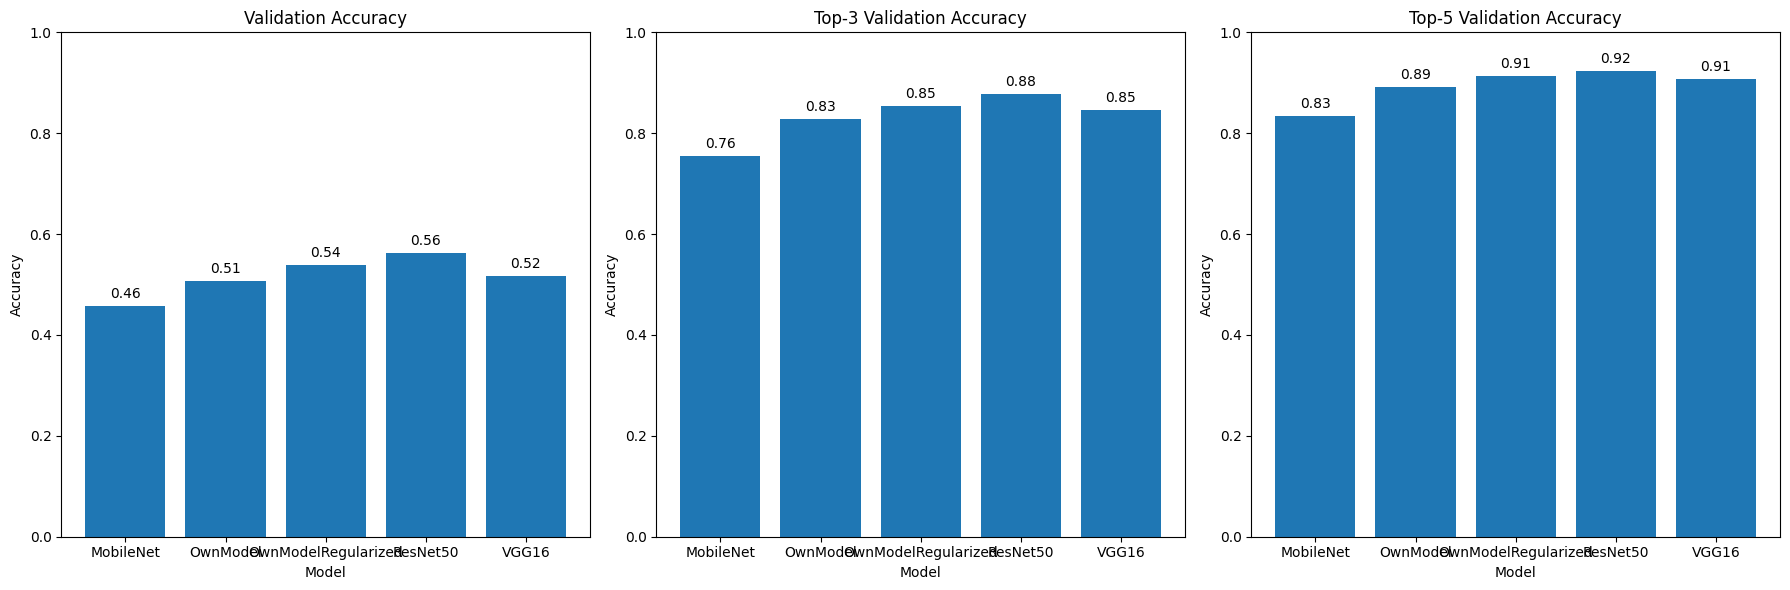

In [17]:
# Function to create bar plots for each Top-k accuracy
def create_bar_plot(y_values, title, y_label, ax):
    ax.bar(top_results[top_results['Dataset'] == run]['Model'], y_values)
    ax.set_title(title)
    ax.set_ylim([0, 1])
    ax.set_xlabel('Model')
    ax.set_ylabel(y_label)
    for i, v in enumerate(y_values):
        ax.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Accuracy'], 'Validation Accuracy', 'Accuracy', axs[0])

# Top-3 Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Top-3 Accuracy'], 'Top-3 Validation Accuracy', 'Accuracy', axs[1])

# Top-5 Accuracy plot
create_bar_plot(top_results[top_results['Dataset'] == run]['Top-5 Accuracy'], 'Top-5 Validation Accuracy', 'Accuracy', axs[2])

plt.tight_layout()
plt.show()

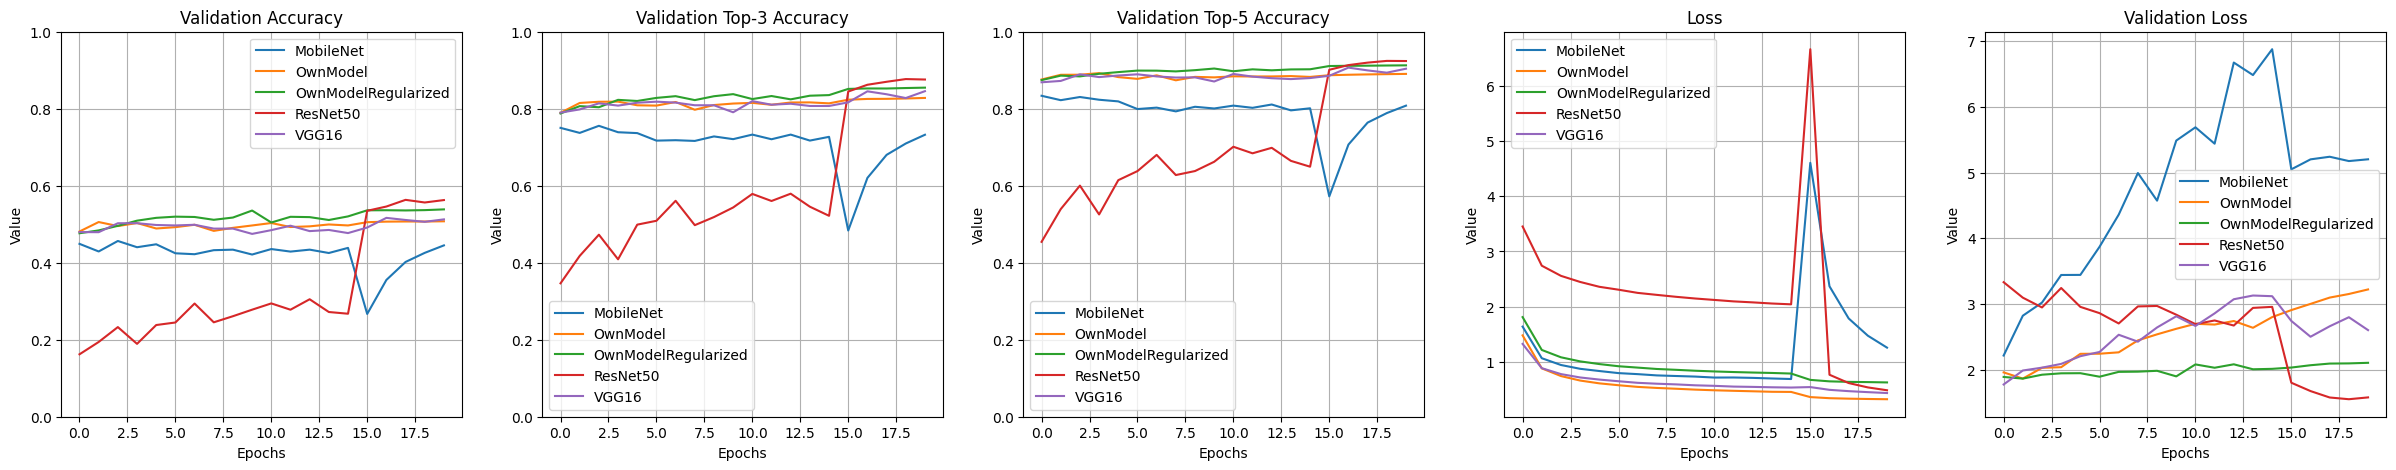

In [21]:
def plot_combined_metrics(histories, titles):
    fig, axs = plt.subplots(1, 5, figsize=(30, 5))
    
    # Iterate over each metric and plot for all models
    for i, metric in enumerate(['val_accuracy', 'val_top_3_accuracy', 'val_top_5_accuracy', 'loss', 'val_loss']):
        for model_name, history in histories.items():
            if run in model_name:
            # For accuracy metrics, plot validation only
                axs[i].plot(history[f'{metric}'], label=f'{model_name.split(" ")[0]}')
        
        axs[i].set_title(f'{titles[i]}')
        axs[i].set_xlabel('Epochs')
        axs[i].set_ylabel('Value')
        if 'accuracy' in metric:
            axs[i].set_ylim([0, 1])
        axs[i].legend()
        axs[i].grid()

plot_combined_metrics(results, ['Validation Accuracy', 'Validation Top-3 Accuracy', 'Validation Top-5 Accuracy', 'Loss', 'Validation Loss'])

#### Accuracy for D1k, D2k

In [70]:
d1k = {}
d2k = {}

for csv in os.listdir('../mod/images_cropped_augmented_1000/'):
    if csv.endswith('.csv'):
        model = os.path.splitext(csv)[0]
        history = pd.read_csv(f'../mod/images_cropped_augmented_1000/{csv}')
        d1k[model] = history
for csv in os.listdir('../mod/images_cropped_augmented_2000'):
    if csv.endswith('.csv'):
        model = os.path.splitext(csv)[0]
        history = pd.read_csv(f'../mod/images_cropped_augmented_2000/{csv}')
        d2k[model] = history

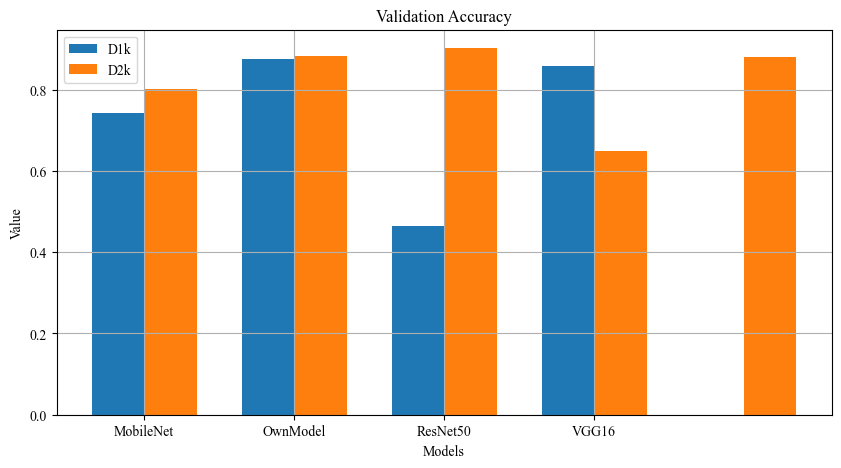

In [81]:
plt.figure(figsize=(10, 5))
bar_width = 0.35
index1 = np.arange(len(d1k.keys()))
index2 = np.arange(len(d2k.keys()))

plt.bar(index1, [d1k[model]['val_top_3_accuracy'][14] for model in d1k.keys()], bar_width, label='D1k')
plt.bar(index2 + bar_width, [d2k[model]['val_top_5_accuracy'][14] for model in d2k.keys()], bar_width, label='D2k')

plt.title('Validation Accuracy')
plt.xlabel('Models')
plt.ylabel('Value')
plt.xticks(index1 + bar_width/2, d1k.keys())
plt.legend()
plt.grid()
plt.show()

In [7]:
# Load the model
models_path = '../mod/images_cropped_augmented_2000'
data_dir = '../dat/images_cropped_augmented_2000'

models = []
for file in os.listdir(os.path.normpath(models_path)):
    if file.endswith('.h5'):
        models.append(file)

# Parameters (replace these with your values)
target_size = (224, 224)  # Example target size
batch_size = 32
validation_split = 0.2

# Image data generator
datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Load data
train_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=False  # Important for evaluation
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for evaluation
)

# Evaluate the model
val_steps = val_data.samples // batch_size

true_classes = val_data.classes
true_classes = true_classes[:val_steps * batch_size]  # Aligning the true labels length with the prediction length

index_to_class = {v: k for k, v in val_data.class_indices.items()}


Found 164657 images belonging to 99 classes.
Found 41150 images belonging to 99 classes.


#### Inference

In [ ]:
results = {}
for model_name in models:
    print(f'Processing {model_name}...')
    model = load_model(models_path + '/' + model_name)

    predictions = model.predict(val_data, steps=val_steps)

    predicted_probs = predictions[:len(true_classes)]  # Aligning the prediction length with true labels
    predicted_labels = np.argmax(predicted_probs, axis=1)

    results[model_name] = {
        'predicted_probs': predicted_probs,
        'predicted_labels': predicted_labels
    }


### Top-K Accuracy

In [9]:
# Custom function to calculate top-k accuracy
def top_k_accuracy(true_labels, pred_labels, k):
    top_k_preds = np.argsort(pred_labels, axis=1)[:, -k:]
    match_array = np.any(top_k_preds == np.array(true_labels)[:, None], axis=1)
    top_k_accuracy = np.mean(match_array)
    return top_k_accuracy


top_k_acc = {}
for model, result in results.items():
    predicted_probs = result['predicted_probs']
    predicted_labels = result['predicted_labels']
    top_k_acc[model] = {}
    for k in [1, 3, 5]:
        ac = top_k_accuracy(true_classes, predicted_probs, k)
        top_k_acc[model][f'top_{k}_accuracy'] = ac
top_k_acc

{'MobileNet_FT_llr.h5': {'top_1_accuracy': 0.4453550583657588,
  'top_3_accuracy': 0.7321741245136186,
  'top_5_accuracy': 0.8077821011673152},
 'OwnModelRegularized_FT_llr.h5': {'top_1_accuracy': 0.5389348249027237,
  'top_3_accuracy': 0.8546206225680933,
  'top_5_accuracy': 0.9126215953307393},
 'OwnModel_FT_llr.h5': {'top_1_accuracy': 0.5079523346303502,
  'top_3_accuracy': 0.8279182879377431,
  'top_5_accuracy': 0.8903696498054474},
 'ResNet50_FT_llr.h5': {'top_1_accuracy': 0.5631566147859922,
  'top_3_accuracy': 0.8757538910505837,
  'top_5_accuracy': 0.9238083657587549},
 'VGG16_FT_llr.h5': {'top_1_accuracy': 0.5129377431906614,
  'top_3_accuracy': 0.845476653696498,
  'top_5_accuracy': 0.9038667315175097}}

## Per-class evaluation

### Custom Metric

In [64]:
k = 10

num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
for model, result in results.items():
    f1s = []
    predicted_labels = result['predicted_labels']
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        FN = np.sum((predicted_labels != class_id) & (true_classes == class_id))
        f1 = 2*TP / (2*TP + FP + FN) if (2*TP + FP + FN) > 0 else 0
        f1s.append(f1)
    # Convert f1s to a numpy array if it's not already
    f1s_array = np.array(f1s)

    results[model]['f1s'] = f1s_array


#### Top-K Predicted Classes

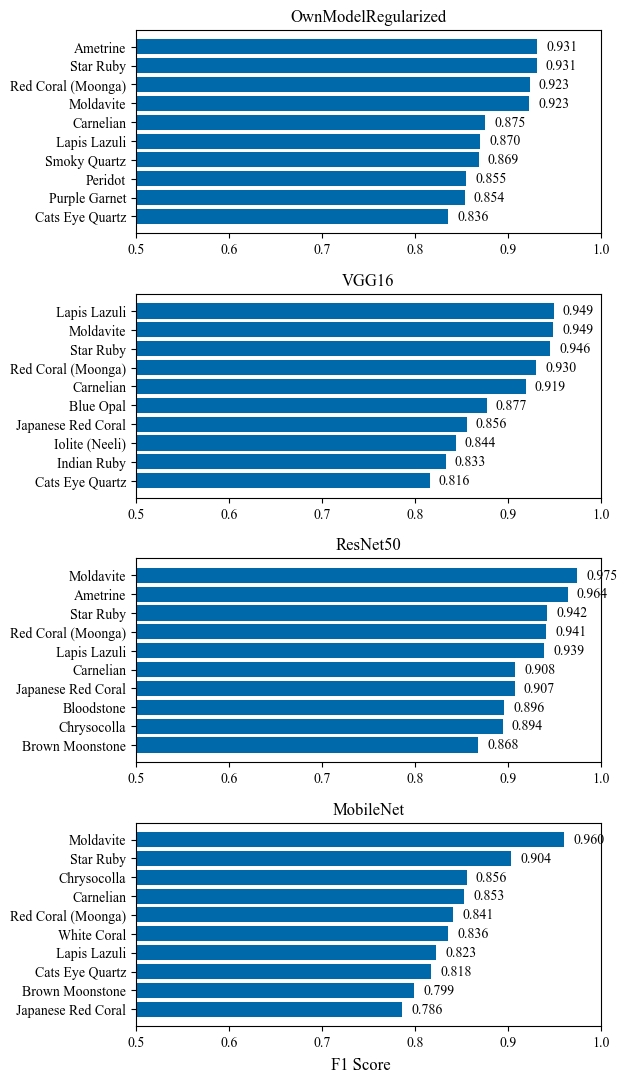

In [67]:
# Define the grid size
num_rows = 4
num_cols = 1 # HAB ICH GEÄNDERT

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# HAB ICH ANGEPASST
model_names = list(results.keys())
model_names.pop(2) # remove OwnModel as it is not of interest
model_names = [model_names[i] for i in [1,3,2,0]]

# Iterate over the results dictionary
#for i, (model, result) in enumerate(results.items()):
for i, model in enumerate(model_names):
    result = results[model]
    # Get the subplot for the current model
    ax = axs[i]
    top_k_indices = np.argsort(result['f1s'])[-k:][::-1] # what is this doing?
    top_k_f1s = result['f1s'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]
    
    # VON MIR ANGEPASST
    top_k_class_names.reverse()
    # reverse the f1 values as well
    top_k_f1s = top_k_f1s[::-1]
    
    # Plot the data on the subplot
    bars = ax.barh(top_k_class_names, top_k_f1s, color=rgb.tue_blue)
    
    #ax.set_xlabel('f1 Score')
    ax.set_xlim([0.5, 1]) # HAB ICH GEÄNDERT
    # ax.set_title(f'Top-{k} Classes with Highest f1 Scores for {model.split(" ")[0]}')
    ax.set_title(model.split("_")[0])
    #ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    #for j, f1 in enumerate(top_k_f1s):
    #    ax.text(f1, j, f'{f1:.2f}', ha='left', va='center')
    for bar, value in zip(bars, top_k_f1s):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}', ha='left', va='center', fontsize=10)

# global plot settings
fig.supxlabel('F1 Score', fontsize=12)
fig.subplots_adjust(hspace=0.3, bottom=0.05)

# Remove any extra subplots if the number of models is less than the grid size
#if len(results) < num_rows * num_cols:
#    for j in range(len(results), num_rows * num_cols):
#        fig.delaxes(axs[j])'

# Adjust the spacing between subplots
# fig.tight_layout()

# Show the plot
plt.savefig("top_f1_scores.png", bbox_inches='tight')
plt.show()


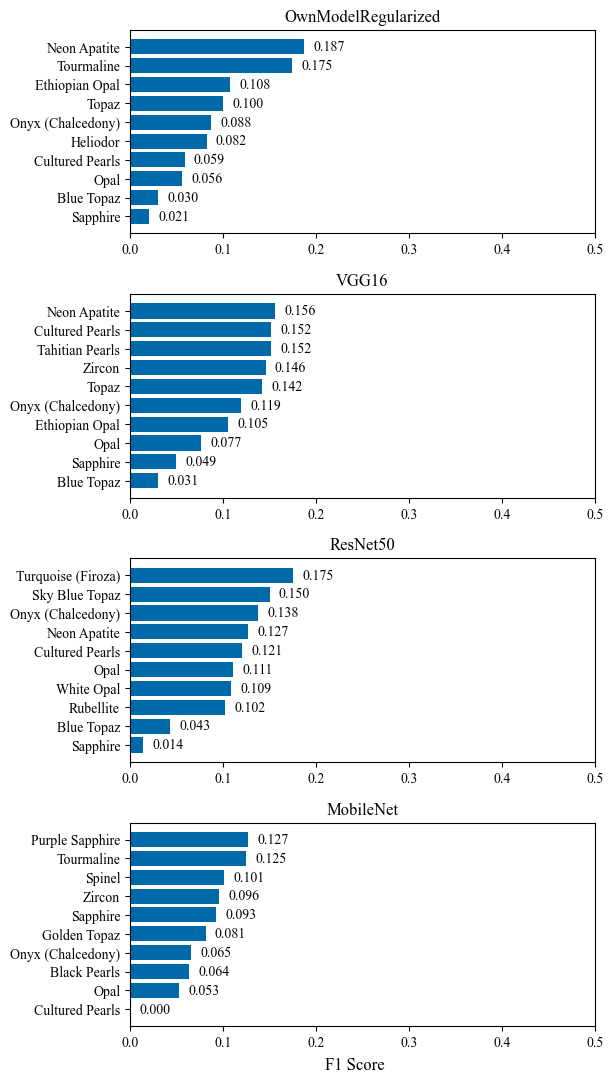

In [68]:
# Define the grid size
num_rows = 4
num_cols = 1 # HAB ICH GEÄNDERT

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# HAB ICH ANGEPASST
model_names = list(results.keys())
model_names.pop(2) # remove OwnModel as it is not of interest
model_names = [model_names[i] for i in [1,3,2,0]]
# Iterate over the results dictionary
#for i, (model, result) in enumerate(results.items()):
for i, model in enumerate(model_names):
    result = results[model]
    # Get the subplot for the current model
    ax = axs[i]
    last_k_indices = np.argsort(result['f1s'])[:k]
    last_k_f1s = result['f1s'][last_k_indices]
    last_k_class_names = [index_to_class[i] for i in last_k_indices]

    # # VON MIR ANGEPASST
    # last_k_class_names.reverse()
    # last_k_f1s = last_k_f1s[::-1]

    # Plot the data on the subplot
    # Plot the data on the subplot
    bars = ax.barh(last_k_class_names, last_k_f1s, color=rgb.tue_blue)
    
    #ax.set_xlabel('f1 Score')
    ax.set_xlim([0, 0.5]) # HAB ICH GEÄNDERT
    # ax.set_title(f'Top-{k} Classes with Highest f1 Scores for {model.split(" ")[0]}')
    ax.set_title(model.split("_")[0])
    #ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    #for j, f1 in enumerate(top_k_f1s):
    #    ax.text(f1, j, f'{f1:.2f}', ha='left', va='center')
    for bar, value in zip(bars, last_k_f1s):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.3f}', ha='left', va='center', fontsize=10)

# global plot settings
fig.supxlabel('F1 Score', fontsize=12)
fig.subplots_adjust(hspace=0.3, bottom=0.05)


# Remove any extra subplots if the number of models is less than the grid size
# if len(results) < num_rows * num_cols:
#     for j in range(len(results), num_rows * num_cols):
#         fig.delaxes(axs[j])

# Adjust the spacing between subplots
# fig.tight_layout()

# Show the plot
plt.savefig("last_f1_scores.png", bbox_inches='tight')
plt.show()


#### Sorted by value

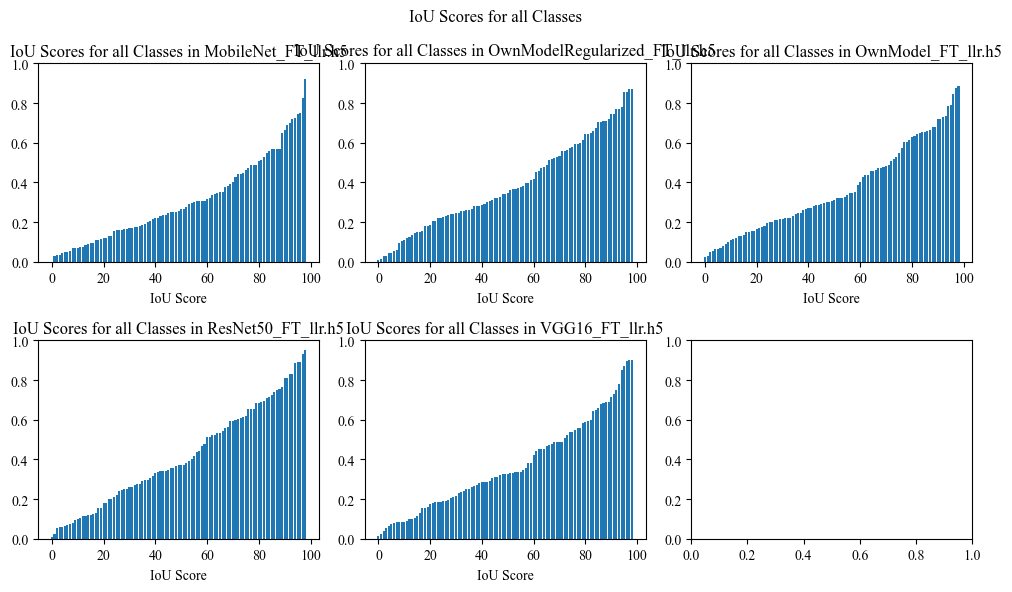

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle('f1 Scores for all Classes')

for i, (model, result) in enumerate(results.items()):
    row = i // 3
    col = i % 3
    axs[row, col].bar(list(range(len(result['f1s']))), result['f1s'][np.argsort(result['f1s'])])
    axs[row, col].set_xlabel('f1 Score')
    axs[row, col].set_ylim([0, 1])
    axs[row, col].set_title(f'f1 Scores for all Classes in {model.split(" ")[0]}')

plt.tight_layout()
plt.show()

# DA SIEHST NIX... NEHMEN WIR NICHT ODER WAS DER PLAN? WENN DANN ALS EINZEL HORIZONTAL BAR PLOTS MIT ALLEN CLASSENNAMEN -> KANN MAN IN APPENDIX PACKEN WENN MAN DAS WILL

### Precision

In [52]:
num_classes = np.max(true_classes) + 1  # Assuming class labels are 0-indexed
# Parameters for top-k and last-k
k = 10

for model, result in results.items():
    predicted_labels = result['predicted_labels']
    precisions = []
    for class_id in range(num_classes):
        TP = np.sum((predicted_labels == class_id) & (true_classes == class_id))
        FP = np.sum((predicted_labels == class_id) & (true_classes != class_id))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        precisions.append(precision)

    # Convert precisions to a numpy array if it's not already
    precisions_array = np.array(precisions)

    results[model]['precisions'] = precisions_array

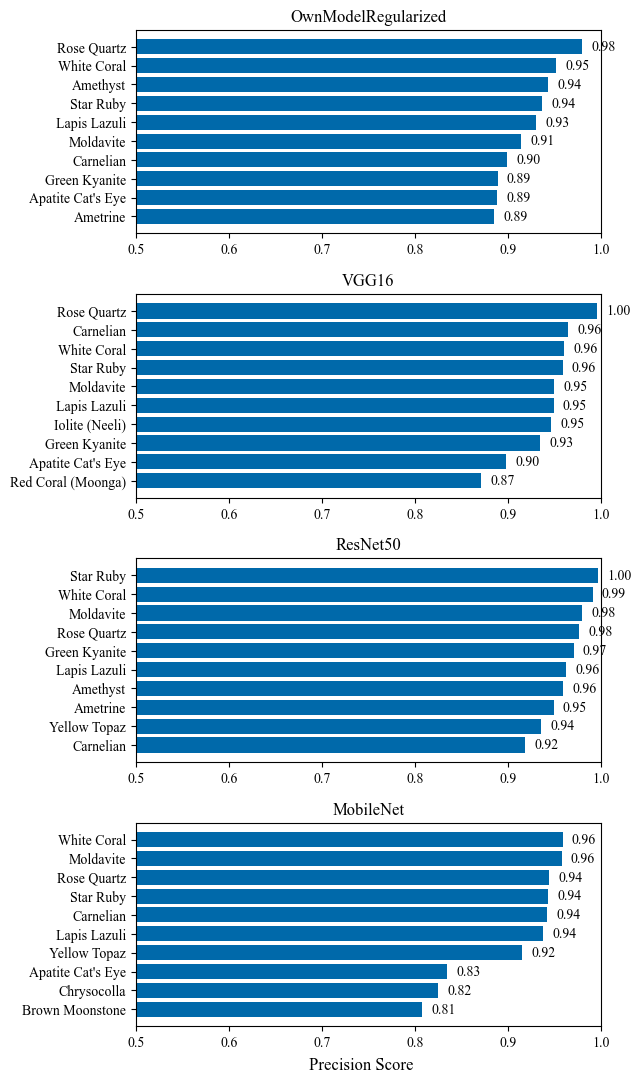

In [53]:
import matplotlib.pyplot as plt
from tueplots.constants.color import rgb

# Define the grid size
num_rows = 4
num_cols = 1 # HAB ICH GEÄNDERT

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# HAB ICH ANGEPASST
model_names = list(results.keys())
model_names.pop(2) # remove OwnModel as it is not of interest
model_names = [model_names[i] for i in [1,3,2,0]]

# Iterate over the results dictionary
#for i, (model, result) in enumerate(results.items()):
for i, model in enumerate(model_names):
    result = results[model]
    # Get the subplot for the current model
    ax = axs[i]
    top_k_indices = np.argsort(result['precisions'])[-k:][::-1] # what is this doing?
    top_k_precision = result['precisions'][top_k_indices]
    top_k_class_names = [index_to_class[i] for i in top_k_indices]
    
    # VON MIR ANGEPASST
    top_k_class_names.reverse()
    # reverse the f1 values as well
    top_k_precision = top_k_precision[::-1]
    
    # Plot the data on the subplot
    bars = ax.barh(top_k_class_names, top_k_precision, color=rgb.tue_blue)
    
    #ax.set_xlabel('f1 Score')
    ax.set_xlim([0.5, 1]) # HAB ICH GEÄNDERT
    # ax.set_title(f'Top-{k} Classes with Highest f1 Scores for {model.split(" ")[0]}')
    ax.set_title(model.split("_")[0])
    #ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    #for j, f1 in enumerate(top_k_f1s):
    #    ax.text(f1, j, f'{f1:.2f}', ha='left', va='center')
    for bar, value in zip(bars, top_k_precision):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='left', va='center', fontsize=10)

# global plot settings
fig.supxlabel('Precision Score', fontsize=12)
fig.subplots_adjust(hspace=0.3, bottom=0.05)

# Remove any extra subplots if the number of models is less than the grid size
#if len(results) < num_rows * num_cols:
#    for j in range(len(results), num_rows * num_cols):
#        fig.delaxes(axs[j])'

# Adjust the spacing between subplots
# fig.tight_layout()

# Show the plot
plt.savefig("top_precisions_scores.png", bbox_inches='tight')
plt.show()


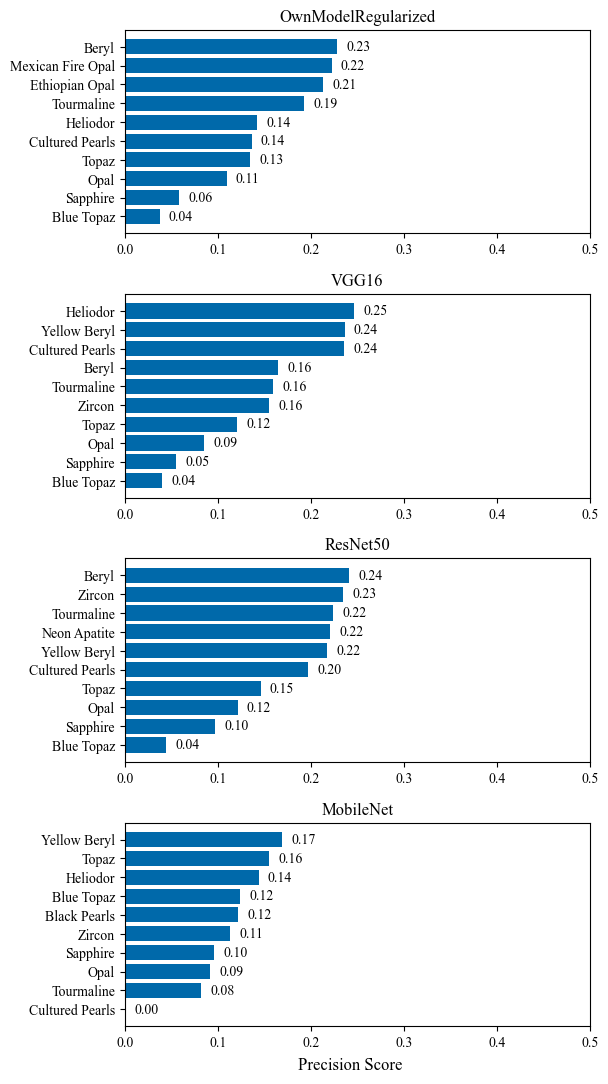

In [54]:
# Define the grid size
num_rows = 4
num_cols = 1 # HAB ICH GEÄNDERT

# Create a figure and axes for subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(6, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# HAB ICH ANGEPASST
model_names = list(results.keys())
model_names.pop(2) # remove OwnModel as it is not of interest
model_names = [model_names[i] for i in [1,3,2,0]]

# Iterate over the results dictionary
#for i, (model, result) in enumerate(results.items()):
for i, model in enumerate(model_names):
    result = results[model]
    # Get the subplot for the current model
    ax = axs[i]
    last_k_indices = np.argsort(result['precisions'])[:k] # what is this doing?
    last_k_precision = result['precisions'][last_k_indices]
    last_k_class_names = [index_to_class[i] for i in last_k_indices]
    
    # # VON MIR ANGEPASST
    # last_k_class_names.reverse()
    # # reverse the f1 values as well
    # last_k_precision = last_k_precision[::-1]
    
    # Plot the data on the subplot
    bars = ax.barh(last_k_class_names, last_k_precision, color=rgb.tue_blue)
    
    #ax.set_xlabel('f1 Score')
    ax.set_xlim([0, 0.5]) # HAB ICH GEÄNDERT
    # ax.set_title(f'Top-{k} Classes with Highest f1 Scores for {model.split(" ")[0]}')
    ax.set_title(model.split("_")[0])
    #ax.invert_yaxis()  # Invert y-axis to have the highest value on top
    #for j, f1 in enumerate(top_k_f1s):
    #    ax.text(f1, j, f'{f1:.2f}', ha='left', va='center')
    for bar, value in zip(bars, last_k_precision):
        ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{value:.2f}', ha='left', va='center', fontsize=10)

# global plot settings
fig.supxlabel('Precision Score', fontsize=12)
fig.subplots_adjust(hspace=0.3, bottom=0.05)

# Remove any extra subplots if the number of models is less than the grid size
#if len(results) < num_rows * num_cols:
#    for j in range(len(results), num_rows * num_cols):
#        fig.delaxes(axs[j])'

# Adjust the spacing between subplots
# fig.tight_layout()

# Show the plot
plt.savefig("last_precisions_scores.png", bbox_inches='tight')
plt.show()


### What was misclassified as what?

In [58]:
data_path = '../dat/gempundit_cropped_augmented_2000'
predicted_labels = results['OwnModelRegularized.h5']['predicted_labels']
last_k_indices = np.argsort(results['OwnModelRegularized.h5']['precisions'])[:k]

# Calculate the confusion matrix
cm = confusion_matrix(true_classes, predicted_labels)

for class_id in last_k_indices:
    class_row = cm[class_id, :].copy()
    class_row[class_id] = 0  # Zero out the diagonal
    
    number_of_misclassifications = np.sum(class_row)
    
    # Most common misclassification
    most_common_misclassified_as = np.argmax(class_row)
    most_common_count = class_row[most_common_misclassified_as]
    most_common_percentage_misclassified = round(most_common_count / number_of_misclassifications * 100, 1)
    
    # Second most common misclassification
    class_row[most_common_misclassified_as] = 0  # Zero out the most common
    second_most_common_misclassified_as = np.argmax(class_row)
    second_most_common_count = class_row[second_most_common_misclassified_as]
    second_most_common_percentage_misclassified = round(second_most_common_count / number_of_misclassifications * 100, 1)
    
    image_count = len(os.listdir(os.path.join(data_path, index_to_class[class_id])))
    
    # Print results 'CVN15J~1' is 'Natural Sapphire'
    print(f"Class '{index_to_class[class_id]}' misclassified {most_common_percentage_misclassified}% as '{index_to_class[most_common_misclassified_as]}' and {second_most_common_percentage_misclassified}% as '{index_to_class[second_most_common_misclassified_as]}'.")


Class 'Blue Topaz' misclassified 71.0% as 'Swiss Blue Topaz' and 7.9% as 'London Blue Topaz'.
Class 'Sapphire' misclassified 30.1% as 'CVN15J~1' and 22.3% as 'Blue Sapphire (Neelam)'.
Class 'Opal' misclassified 43.9% as 'Australian Opal' and 17.4% as 'Black Opal'.
Class 'Topaz' misclassified 57.9% as 'Swiss Blue Topaz' and 4.6% as 'London Blue Topaz'.
Class 'Cultured Pearls' misclassified 72.7% as 'South Sea Pearls' and 15.1% as 'Pearl (Moti)'.
Class 'Heliodor' misclassified 42.4% as 'Beryl' and 40.4% as 'Yellow Beryl'.
Class 'Tourmaline' misclassified 27.7% as 'Green Tourmaline (Verdelite)' and 9.5% as 'Alexandrite'.
Class 'Ethiopian Opal' misclassified 48.5% as 'Black Opal' and 16.7% as 'Opal'.
Class 'Mexican Fire Opal' misclassified 34.4% as 'Fire Opal' and 23.9% as 'Citrine (Sunela)'.
Class 'Beryl' misclassified 53.0% as 'Yellow Beryl' and 17.2% as 'Citrine (Sunela)'.
